In [1]:
%run style_and_packages.ipynb

# Beispiel: Balken ohne Tilger

## Aufgabenstellung

Ein einfacher Balken mit einer Einzelmasse, welcher in dieser Aufgabe ohne Tilger ausgestattet ist, ist in @fig-ems_untilg_system_ohne_tilger dargestellt. Die Masse erfährt eine dynamische Einwirkung durch die Funktion $F(t)$. Das Beispiel wird in @sec-tilger weitergeführt.

![Statisches System des Balkens ohne Tilger](bilder/aufgabe_ems_untilg_system.svg){#fig-ems_untilg_system_ohne_tilger}

Gesucht:

- Maximale dynamische Verformung mittels stationärer Lösung
- Maximale dynamische Beschleunigung mittels stationärer Lösung

Gegeben:

- Biegestab $E = 200000 \text{N}/{mm}^2$
- Flächenträgheitsmoment des Stabs $I = 2 \cdot 10^8 \text{mm}^4$
- Punktmasse $M_H = 2000 \text{kg}$

$$
F(t) = F_0 \cdot \sin(\omega\cdot t) = 0.8 \text{kN} \cdot (12.6 \frac{\text{rad}}{\text{s}}\cdot t)
$$

{{< pagebreak >}}

## Musterlösung

In [2]:
#| label: tbl-parameter_mms3
#| tbl-cap: Verwendete Parameter

params = {'E': 200*10**3 *unit.N/unit.mm**2,
          'I':2*10**8*unit.mm**4,
          'M_H':2000*unit.N*unit.second**2/unit.m,
          'L':5*unit.m,
          'F_0':0.8*10**3*unit.N,
          'omega':12.6/unit.second,
          'zeta':0.0         
          }

render.dict_to_table(params)

| Parameter |  |
|---|---|
| $E = \frac{200000 \text{N}}{\text{mm}^{2}}$ | $F_{0} = 800.0 \text{N}$ |
| $I = 200000000 \text{mm}^{4}$ | $L = 5 \text{m}$ |
| $M_{H} = \frac{2000 \text{N} \text{s}^{2}}{\text{m}}$ | $\omega = \frac{12.6}{\text{s}}$ |
| $\zeta = 0.0$ | |


In [3]:
E, I, M_H, zeta,  L, F_0, omega, delta_11, delta_12 = sp.symbols('E, I, M_H, zeta, L , F_0, omega, delta_11, delta_12')

t = sp.symbols('t')

In [4]:
F_t = F_0 * sp.sin(omega*t)

### Steifigkeit $k$

Zuerst wird die Steifigkeit des Systems ermittelt, für einen Einmassenschwinger entspricht dies der Biegesteifigkeit des Balkens.

In [5]:
k_H = 48 * (E*I) / (2*L)**3


render.eq_display('k_H', k_H,
                  'k_H',k_H.subs(params).simplify().evalf(3))


      6⋅E⋅I
k_H = ─────
         3 
        L  

      1.92e+6⋅newton
k_H = ──────────────
          meter     

### Eigenkreisfrequenz $\omega$

Die Eigekreisfrequenz kann mit der bekannten Formel ermittelt werden:

In [6]:
omega_n = sp.sqrt(k_H / M_H)

render.eq_display('omega_n', "sqrt(k/m)",
                  'omega_n', omega_n,
                  'omega_n', omega_n.subs(params).simplify().evalf(3))

         ___
        ╱ k 
ωₙ =   ╱  ─ 
     ╲╱   m 

             ________
            ╱  E⋅I   
ωₙ = √6⋅   ╱  ────── 
          ╱    3     
        ╲╱    L ⋅M_H 

      31.0 
ωₙ = ──────
     second

### Vergrösserungsfaktor $V(\omega)$

Da lediglich die Stationäre Antwort von Interesse ist, kann mittels Vergrösserungsfaktor diese ermittelt werden. Der Verlauf entspricht der Anregungsfunktion. Amplitude definiert sich aus der statischen Deformation mit dem Vergrösserungsfaktor multipliziert.

In [7]:
V_omega = 1/(sp.sqrt((1-(omega/omega_n)**2)**2 + (2*zeta*(omega/omega_n))**2))

render.eq_display('V(omega)', '1/(sqrt((1-(omega/omega_n)**2)**2 + (2*zeta_*(omega/omega_n))**2))',
                  'V(omega)', V_omega.subs(params).simplify().evalf(3))

                      1               
V(ω) = ───────────────────────────────
              ________________________
             ╱                      2 
            ╱     2  2   ⎛    2    ⎞  
           ╱   4⋅ω ⋅ζ    ⎜   ω     ⎟  
          ╱    ─────── + ⎜- ─── + 1⎟  
         ╱         2     ⎜    2    ⎟  
       ╲╱        ωₙ      ⎝  ωₙ     ⎠  

V(ω) = 1.2

### Stationäre Lösung

#### Statische Deformation

In [8]:
u_0 = F_0 / k_H

render.eq_display('u_0', 'F_0 / k_H',
                  'u_0', u_0,
                  'u_0', unit.convert_to(u_0.subs(params).simplify().evalf(4), unit.mm))

      F₀
u₀ = ───
     k_H

         3
     F₀⋅L 
u₀ = ─────
     6⋅E⋅I

u₀ = 0.4167⋅millimeter

#### Stationäre maximale Deformation

In [9]:
u_stat = u_0 * V_omega

render.eq_display('u_stat', 'u_0 * V(omega)',
                  'u_stat', u_stat,
                  'u_stat', unit.convert_to(u_stat.subs(params).simplify().evalf(3), unit.mm))

uₛₜₐₜ = u₀⋅V(ω)

                                 3                     
                             F₀⋅L                      
uₛₜₐₜ = ───────────────────────────────────────────────
                    ___________________________________
                   ╱                2                  
                  ╱  ⎛     3      2⎞       3      2  2 
                 ╱   ⎜    L ⋅M_H⋅ω ⎟    2⋅L ⋅M_H⋅ω ⋅ζ  
        6⋅E⋅I⋅  ╱    ⎜1 - ─────────⎟  + ────────────── 
              ╲╱     ⎝      6⋅E⋅I  ⎠        3⋅E⋅I      

uₛₜₐₜ = 0.499⋅millimeter

#### Stationäre maximale Beschleunigung

In [10]:
V_a_omega = omega**2 / omega_n**2 * V_omega

u_2_stat =  F_0 / M_H * V_a_omega

render.eq_display('V_a(omega)', "omega**2 / omega_n**2 * V_omega",
                  'V_a(omega)', V_a_omega.subs(params).simplify().evalf(3),
                  'Derivative(u_stat,t,2)', u_2_stat.subs(params).simplify().evalf(3))

             2
        V_ω⋅ω 
Vₐ(ω) = ──────
           2  
         ωₙ   

Vₐ(ω) = 0.198

  2                      
 d           0.0793⋅meter
───(uₛₜₐₜ) = ────────────
  2                  2   
dt             second    

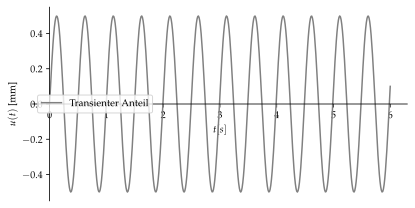

In [15]:
#| label: fig-ems_untilg_stationaer_antwort
#| fig-cap: "Stationäre Antwort des Systems"


u_t = u_stat * sp.sin(omega*t)

params_plot = convert.param_value(params)

u_t_plot = u_t.subs(params_plot).subs(unit.second, 1)*1000

p_1 = sp.plot(u_t_plot, (t,0,6), adaptive=False, nb_of_points=500, 
        xlabel='$t [s]$',
        ylabel='$u(t)$ [mm]',
        size=(5.9,3),show=False,label='Transienter Anteil', legend=True, line_color='0.5')


p_1.show()